We are an agency helping our customers purchase XoX (a made-up product) from various makers. Price is one of the most important things we care about. We need to estimate the price of a XoX before we recommend it to our customers. However, the estimations vary significantly with our employees' experience. 

We would like you to build a machine learning model to accurately predict the price for a future purchase and provide insights to help us explain the predicted price to our customers. Please note that neither our customers nor us have any knowledge about machine learning. A sample of our sales record is available in ../data/sales.csv.


1. Preprocess, clean, analyze and visualized the provided data. A few sentences or plots describing your approach will suffice. Any thing you would like us to know about the price?
2. Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, what alternatives you consider, and any concerns you have. How is the performance of your model?
3. Help us understand how the price is predicted (again, a few sentences will suffice).

# Pre-model Analysis: process and visualize data; get insights of features and target.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sales.csv')

In [3]:
df

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm
...,...,...,...,...,...,...,...,...,...,...,...
3192,NaN,"$93,349",3 Ton 0 Kg,Nov 25 2016,D,advanced,M14904,"IN732490,IN732338,IN732503,IN732435,IN732583",2.02 meters,112 cm,29 cm
3193,NaN,"$40,384",2 Ton 830 Kg,May 25 2007,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15 meters,106 cm,28 cm
3194,NaN,"$1,074,844",3 Ton 80 Kg,Dec 16 2016,C,intermediate,"M14883,M15011","IN733462,IN732654,IN732149,IN733067,IN734088,I...",2.84 meters,96 cm,25 cm
3195,$44k,"$55,931",2 Ton 950 Kg,Apr 12 2002,R,advanced,M14341,IN732587,2.52 meters,100 cm,26 cm


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cost           2216 non-null   object
 1   price          3186 non-null   object
 2   weight         3193 non-null   object
 3   purchase_date  3196 non-null   object
 4   product_type   3196 non-null   object
 5   product_level  3196 non-null   object
 6   maker          2373 non-null   object
 7   ingredient     2941 non-null   object
 8   height         3197 non-null   object
 9   width          3193 non-null   object
 10  depth          3193 non-null   object
dtypes: object(11)
memory usage: 274.9+ KB


In [5]:
df.describe()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
count,2216,3186,3193,3196,3196,3196,2373,2941,3197,3193,3193
unique,185,3157,119,1278,64,5,882,2833,161,41,13
top,$66k,"$20,061",3 Ton 0 Kg,Oct 05 2001,D,advanced,M14196,IN732638,2.54 meters,99 cm,26 cm
freq,104,2,127,8,485,1323,17,8,63,268,903


In [6]:
# missing data
number = df.isnull().sum()
percent = number/len(df)*100
missing_Data = pd.concat([number , percent], axis=1, keys=['number', 'percent'])
missing_Data

,number,percent
cost,981,30.685017
price,11,0.344073
weight,4,0.125117
purchase_date,1,0.031279
product_type,1,0.031279
product_level,1,0.031279
maker,824,25.774163
ingredient,256,8.007507
height,0,0.000000
width,4,0.125117


<AxesSubplot:xlabel='purchase_date'>

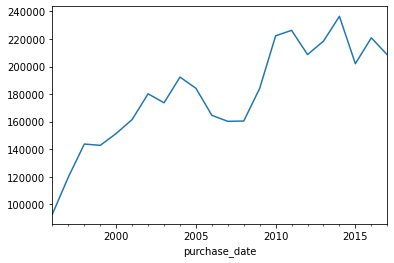

In [7]:
# have a glance of target price by year
purchase_date = pd.to_datetime(df.purchase_date)
price = df.price.map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))
price.index = purchase_date
# plot price by year
price.resample("Y").mean().plot()

<AxesSubplot:xlabel='month'>

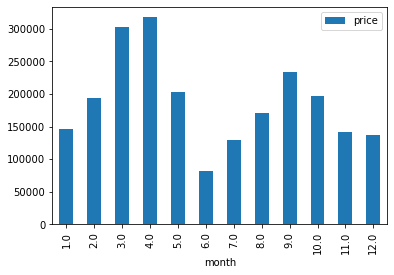

In [8]:
# have a glance of target price by month
month = purchase_date.dt.month
df_tmp = pd.DataFrame({"price": price.values, 'month': month})
df_tmp.groupby('month').mean().plot(kind = 'bar')

<font color='red'>**Insights**: price gradually increased with the increase of year; price changed in different months.
<br>   
**Numericla target**: price
<br>
**Numerical features**(5): cost, weight, height, width, depth 
<br>
**Categorical features**(4): product_type, product_level, maker, ingredient
<br>
**Time series**(1): purchase_date
<br>
<br>
**Missing data strategies**
    <br>
    1.drop: price, product_type, product_level, purchase_date
    <br>
    2.replace with mean: cost, weight, width, depth
    <br>
    3.replace with 'unknown': maker, ingredient	
    
    
</font>

# Problem Definition: translate the business needs into machine learning problems; design metrics to measure model performance.

**Business needs**:  to build a machine learning model to accurately predict the price of XoX (a made-up product) for a future purchase by using the historical data including 9 features.
<br>
**Machine learning model**: a regression model with the most relevant features to price
<br>
**Model metrics**: MAE, MSE, R2

# Feature Engineering: create features which might improve model performance.

## Data cleaning

In [9]:
# drop missing values in target price
mydf = df.dropna(subset=['price']).reset_index(drop=True)
mydf

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm
...,...,...,...,...,...,...,...,...,...,...,...
3181,NaN,"$93,349",3 Ton 0 Kg,Nov 25 2016,D,advanced,M14904,"IN732490,IN732338,IN732503,IN732435,IN732583",2.02 meters,112 cm,29 cm
3182,NaN,"$40,384",2 Ton 830 Kg,May 25 2007,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15 meters,106 cm,28 cm
3183,NaN,"$1,074,844",3 Ton 80 Kg,Dec 16 2016,C,intermediate,"M14883,M15011","IN733462,IN732654,IN732149,IN733067,IN734088,I...",2.84 meters,96 cm,25 cm
3184,$44k,"$55,931",2 Ton 950 Kg,Apr 12 2002,R,advanced,M14341,IN732587,2.52 meters,100 cm,26 cm


In [10]:
# missing data in mydf
number = mydf.isnull().sum()
percent = number/len(mydf)*100
missing_Data_mydf = pd.concat([number , percent], axis=1, keys=['number', 'percent'])
missing_Data_mydf

,number,percent
cost,975,30.602637
price,0,0.000000
weight,3,0.094162
purchase_date,0,0.000000
product_type,0,0.000000
product_level,0,0.000000
maker,821,25.768989
ingredient,254,7.972379
height,0,0.000000
width,3,0.094162


In [11]:
# numerical data cleaning: cost, weight, height, width, depth
mydf['price'] = mydf['price'].map(lambda x: float(x.strip('$').replace(',','')) if type(x) == str else x)
mydf['cost'] = mydf['cost'].map(lambda x: float(x.strip('$').strip('k'))*1000 if type(x) == str else x)
mydf['weight'] = mydf['weight'].map(lambda x:float(x.strip('Kg').split('Ton')[0])*1000+float(x.strip('Kg').split('Ton')[1]) if type(x) == str else x)
mydf['height'] = mydf['height'].map(lambda x: float(x.strip('meters').strip())*100 if type(x) == str else x)
mydf['width'] = mydf['width'].map(lambda x: float(x.strip('cm')) if type(x) == str else x)
mydf['depth'] = mydf['depth'].map(lambda x: float(x.strip('cm')) if type(x) == str else x)


In [13]:
# categorical data cleaning: product_type, product_level, maker, ingredient

# ordinal transform product_level
product_type_convert = {"unrated": 0, "basic": 1, "intermediate": 2, "advanced": 3, "super advanced": 4}
mydf["product_level"] = mydf["product_level"].map(lambda x: product_type_convert[x])

In [14]:
# frequence transform product_type, maker, ingredient
for column in ("product_type", "maker", "ingredient"):
    convert = {}
    for item in mydf[column][mydf[column].notnull()]:
        if item not in convert:
            convert[item] = 1
        else:
            convert[item] += 1
    mydf[column] = mydf[column].map(lambda x: convert[x], na_action="ignore")

In [15]:
# time series data cleaning

# creat two new column named year and month
mydf['year'] = pd.to_datetime(mydf.purchase_date).dt.year
mydf['month'] = pd.to_datetime(mydf.purchase_date).dt.month
# drop purchase_date column
mydf = mydf.drop(columns="purchase_date")

In [16]:
mydf

,cost,price,weight,product_type,product_level,maker,ingredient,height,width,depth,year,month
0,333000.0,300492.0,3090.0,26,3,8.0,1.0,276.0,97.0,26.0,2008,12
1,NaN,430570.0,3030.0,96,1,NaN,1.0,267.0,98.0,26.0,1997,9
2,270000.0,213070.0,3040.0,96,1,NaN,1.0,300.0,93.0,24.0,2001,9
3,NaN,229174.0,3050.0,179,3,1.0,1.0,250.0,102.0,27.0,2016,12
4,97000.0,122659.0,2970.0,166,3,NaN,1.0,247.0,101.0,26.0,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3181,NaN,93349.0,3000.0,485,3,5.0,1.0,202.0,112.0,29.0,2016,11
3182,NaN,40384.0,2830.0,67,2,3.0,1.0,215.0,106.0,28.0,2007,5
3183,NaN,1074844.0,3080.0,201,2,1.0,1.0,284.0,96.0,25.0,2016,12
3184,44000.0,55931.0,2950.0,62,3,4.0,2.0,252.0,100.0,26.0,2002,4


## Analyze correlations

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
numerical_df = pd.DataFrame()
numerical_df['price'] = mydf['price']
numerical_df['cost'] = mydf['cost']
numerical_df['weight'] = mydf['weight']
numerical_df['height'] = mydf['height']
numerical_df['width'] = mydf['width']
numerical_df['depth'] = mydf['depth']

numerical_df

,price,cost,weight,height,width,depth
0,300492.0,333000.0,3090.0,276.0,97.0,26.0
1,430570.0,NaN,3030.0,267.0,98.0,26.0
2,213070.0,270000.0,3040.0,300.0,93.0,24.0
3,229174.0,NaN,3050.0,250.0,102.0,27.0
4,122659.0,97000.0,2970.0,247.0,101.0,26.0
...,...,...,...,...,...,...
3181,93349.0,NaN,3000.0,202.0,112.0,29.0
3182,40384.0,NaN,2830.0,215.0,106.0,28.0
3183,1074844.0,NaN,3080.0,284.0,96.0,25.0
3184,55931.0,44000.0,2950.0,252.0,100.0,26.0


In [26]:
numerical_df.corr(method='pearson')

,price,cost,weight,height,width,depth
price,1.000000,0.627414,0.296412,0.076193,0.081460,0.084387
cost,0.627414,1.000000,0.357327,0.074708,0.121367,0.119569
weight,0.296412,0.357327,1.000000,0.176519,0.352570,0.343021
height,0.076193,0.074708,0.176519,1.000000,-0.851370,-0.837142
width,0.081460,0.121367,0.352570,-0.851370,1.000000,0.979355
depth,0.084387,0.119569,0.343021,-0.837142,0.979355,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'cost'),
  Text(0, 2.5, 'weight'),
  Text(0, 3.5, 'height'),
  Text(0, 4.5, 'width'),
  Text(0, 5.5, 'depth')])

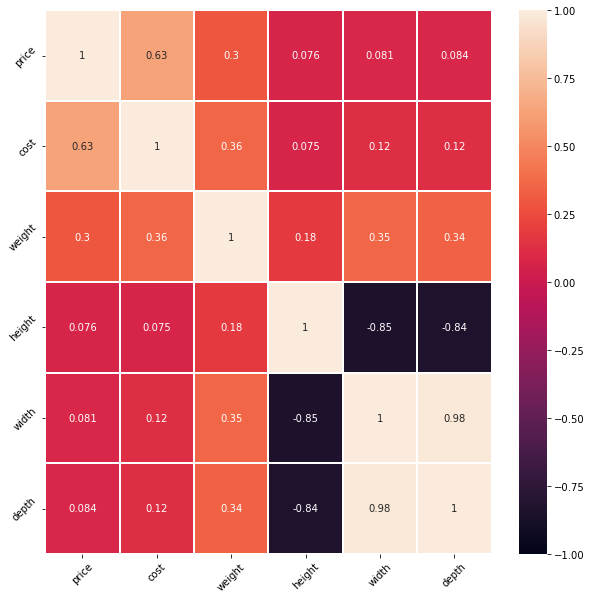

In [27]:
# plot the correlations
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(numerical_df.corr(method='pearson'), vmin=-1, vmax=1, lw=2, annot=True) 
plt.xticks(rotation=45)
plt.yticks(rotation=45)

<font color='red'>
Highly positively correlated features: width vs depth
<br>
Highly negatively correlated features: height vs width, height vs depth
<br>

**Stratagies**:
    <br>
Based on domain knowledge, we can creat a new feature called 'volume' to replace height, width and depth in our model

</font>

In [28]:
# creat a new column: volume
numerical_df['volume'] = numerical_df.height * numerical_df.width * numerical_df.depth*100

# drop height,width and depth
numerical_df = numerical_df.drop(['height', 'width', 'depth'],axis=1)
numerical_df

,price,cost,weight,volume
0,300492.0,333000.0,3090.0,69607200.0
1,430570.0,NaN,3030.0,68031600.0
2,213070.0,270000.0,3040.0,66960000.0
3,229174.0,NaN,3050.0,68850000.0
4,122659.0,97000.0,2970.0,64862200.0
...,...,...,...,...
3181,93349.0,NaN,3000.0,65609600.0
3182,40384.0,NaN,2830.0,63812000.0
3183,1074844.0,NaN,3080.0,68160000.0
3184,55931.0,44000.0,2950.0,65520000.0


In [29]:
# correlations in current numerical_df
numerical_df.corr(method='pearson')

,price,cost,weight,volume
price,1.000000,0.627414,0.296412,0.295206
cost,0.627414,1.000000,0.357327,0.352933
weight,0.296412,0.357327,1.000000,0.980877
volume,0.295206,0.352933,0.980877,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'cost'),
  Text(0, 2.5, 'weight'),
  Text(0, 3.5, 'volume')])

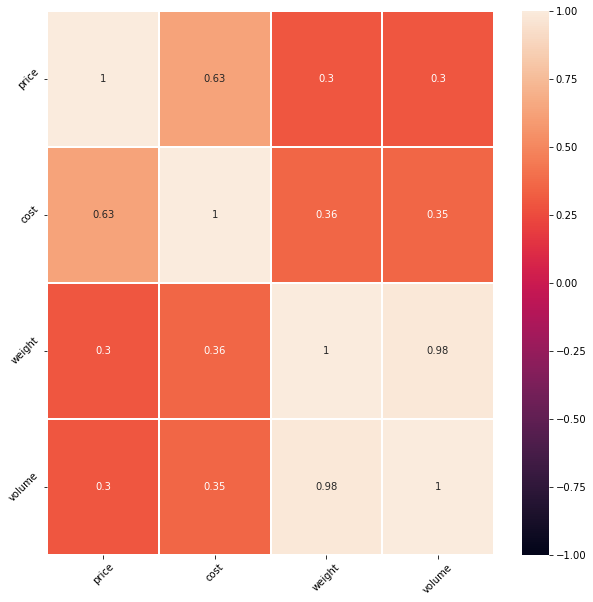

In [30]:
# plot the correlations
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(numerical_df.corr(method='pearson'), vmin=-1, vmax=1, lw=2, annot=True) 
plt.xticks(rotation=45)
plt.yticks(rotation=45)

<font color='red'>
Highly positively correlated features: volume vs weight; so exclude volume and keep weight
</font>   

In [31]:
# drop height,width and depth in mydf
mydf = mydf.drop(['height', 'width', 'depth'],axis=1)
mydf

,cost,price,weight,product_type,product_level,maker,ingredient,year,month
0,333000.0,300492.0,3090.0,26,3,8.0,1.0,2008,12
1,NaN,430570.0,3030.0,96,1,NaN,1.0,1997,9
2,270000.0,213070.0,3040.0,96,1,NaN,1.0,2001,9
3,NaN,229174.0,3050.0,179,3,1.0,1.0,2016,12
4,97000.0,122659.0,2970.0,166,3,NaN,1.0,2000,1
...,...,...,...,...,...,...,...,...,...
3181,NaN,93349.0,3000.0,485,3,5.0,1.0,2016,11
3182,NaN,40384.0,2830.0,67,2,3.0,1.0,2007,5
3183,NaN,1074844.0,3080.0,201,2,1.0,1.0,2016,12
3184,44000.0,55931.0,2950.0,62,3,4.0,2.0,2002,4


In [32]:
# missing data in mydf
number = mydf.isnull().sum()
percent = number/len(mydf)*100
missing_Data_mydf = pd.concat([number , percent], axis=1, keys=['number', 'percent'])
missing_Data_mydf

,number,percent
cost,975,30.602637
price,0,0.000000
weight,3,0.094162
product_type,0,0.000000
product_level,0,0.000000
maker,821,25.768989
ingredient,254,7.972379
year,0,0.000000
month,0,0.000000


# Modeling: Model selection, feature elimination, validation, hyperparameter tuning.

In [24]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## Split train and test

In [25]:
# split by 2014
train_raw = mydf[mydf.year < 2014].reset_index(drop=True)
test_raw = mydf[mydf.year >= 2014].reset_index(drop=True)
# percentage of data in train_raw <2014
print('Percentage of data in train_raw is ' + str(round(len(train_raw)/len(df)*100,2))+ '%')

Percentage of data in train_raw is 81.67%


In [26]:
# split by 2015
train_raw = mydf[mydf.year < 2015].reset_index(drop=True)
test_raw = mydf[mydf.year >= 2015].reset_index(drop=True)
# percentage of data in train_raw <2015
print('Percentage of data in train_raw is ' + str(round(len(train_raw)/len(df)*100,2))+ '%')

Percentage of data in train_raw is 86.24%


<font color='red'>
Both are good to split data.
    </font>

In [27]:
# class a transformer
class Transformer():
    
    # we take these variables because they show some correlation with price. 
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
        df['weight'] = X.weight
        df['product_level'] = X.product_level
        df['maker'] = X.maker
        self.mean = df.mean()
         
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
        df['weight'] = X.weight
        df['product_level'] = X.product_level
        df['maker'] = X.maker
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [28]:
features = list(mydf.columns)
target = "price"
features.remove(target)

X_train = train_raw[features]
y_train = train_raw[target]

X_test = test_raw[features]
y_test = test_raw[target]

## Linear regression model

In [29]:
steps_1r = [('tf', Transformer()),
         ('rescale',MinMaxScaler()),
         ('lr', LinearRegression())]

model_1r = Pipeline(steps_1r)
model_1r = model_1r.fit(X_train, y_train)

y_train_pred = model_1r.predict(X_train)
y_test_pred = model_1r.predict(X_test)

In [30]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))# 0 means index of x/features
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.12e+05
train MSE: 2.79e+10
train R2: 0.344


In [31]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.42e+05
test MSE: 5.66e+10
test R2: 0.344


## Random Forest model

In [32]:
steps_rf = [('tf', Transformer()),
         ('tree', RandomForestRegressor(random_state = 2022))]

model_rf = Pipeline(steps_rf)
model_rf = model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

In [33]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))# 0 means index of x/features
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 4.20e+04
train MSE: 4.22e+09
train R2: 0.901


In [34]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.25e+05
test MSE: 5.44e+10
test R2: 0.369


## Xgboost model

In [35]:
steps_xgb = [('tf', Transformer()),
          ('xgbr', XGBRegressor(random_state = 2022))]

model_xgb = Pipeline(steps_xgb)
model_xgb = model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

In [36]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))# 0 means index of x/features
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 4.86e+04
train MSE: 4.82e+09
train R2: 0.887


In [37]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.27e+05
test MSE: 5.72e+10
test R2: 0.337


<font color='red'> 
Based on the model metrics, Random Forest model has the best performance. 
    </font>

## hyperparameter tuning

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [108]:
parameters = {
              'rf__max_depth': [3, 6, 9, 20, 50, 100], #default is None, which means infinity
              'rf__min_samples_leaf': [1, 3, 5, 10, 20],
              'rf__min_samples_split': [2, 3, 5, 8]
             }

In [109]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

In [110]:
steps = [('tf', Transformer()),
         ('rf', RandomForestRegressor(n_estimators=50,n_jobs=-1,random_state = 2022))]
model = Pipeline(steps)

In [111]:
model_gsv = GridSearchCV(model,
                         parameters,
                         cv = 3,
                         scoring = scorer,
                         n_jobs=-1,
                         return_train_score=True)

In [112]:
model_gsv = model_gsv.fit(X_train, y_train)

In [113]:
model_gsv.best_score_

-25670400234.614407

In [114]:
model_gsv.cv_results_

{'mean_fit_time': array([0.17693384, 0.17715351, 0.19502147, 0.15254116, 0.19054763,
        0.18125423, 0.16084146, 0.16025297, 0.18390234, 0.18455545,
        0.1789333 , 0.17985113, 0.20969526, 0.19366717, 0.16876856,
        0.21669634, 0.21267064, 0.1972065 , 0.16822926, 0.18238195,
        0.20346864, 0.21825385, 0.22060474, 0.21135338, 0.20958177,
        0.21189483, 0.23225292, 0.17114663, 0.25827861, 0.16295369,
        0.18583822, 0.20415823, 0.21761576, 0.17664854, 0.20821484,
        0.19561664, 0.18674366, 0.18274275, 0.21498998, 0.19731967,
        0.23292462, 0.20879332, 0.25775377, 0.23377617, 0.1836741 ,
        0.23155419, 0.21122964, 0.1849579 , 0.20940137, 0.22243802,
        0.21587825, 0.22417649, 0.17055909, 0.23302937, 0.21988209,
        0.18982148, 0.2034595 , 0.20872355, 0.26628264, 0.17415468,
        0.27666847, 0.3108174 , 0.27270444, 0.26090018, 0.26676822,
        0.30079301, 0.32238301, 0.20057154, 0.24603677, 0.27958202,
        0.27660203, 0.2422332 ,

In [115]:
model_gsv.param_grid

{'rf__max_depth': [3, 6, 9, 20, 50, 100],
 'rf__min_samples_leaf': [1, 3, 5, 10, 20],
 'rf__min_samples_split': [2, 3, 5, 8]}

In [116]:
model_gsv.best_estimator_

Pipeline(steps=[('tf', <__main__.Transformer object at 0x000002983490AF40>),
                ('rf',
                 RandomForestRegressor(max_depth=9, min_samples_leaf=10,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=2022))])

In [117]:
y_train_pred = model_gsv.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 8.96e+04
train MSE: 2.02e+10
train R2: 0.525


In [118]:
y_test_pred = model_gsv.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.20e+05
test MSE: 5.15e+10
test R2: 0.403


# Post-model Analysis: Model performance, feature importance, actionable suggestions to business.

## Model performance

In [119]:
steps_rf = [('tf', Transformer()),
         ('tree', RandomForestRegressor(max_depth=9, min_samples_leaf=10,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=2022))]

model_rf = Pipeline(steps_rf)
model_rf = model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

In [120]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))# 0 means index of x/features
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 8.96e+04
train MSE: 2.02e+10
train R2: 0.525


In [121]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.20e+05
test MSE: 5.15e+10
test R2: 0.403


## feature importance

In [122]:
# feature importance
importances = model_rf.steps[1][1].feature_importances_
importances

array([0.72891938, 0.12700888, 0.04359992, 0.10047182])

In [123]:
names = model_rf[1].feature_names_in_
names

array(['cost', 'weight', 'product_level', 'maker'], dtype=object)

([<matplotlib.axis.XTick at 0x298348e3190>,
 [Text(0, 0, 'cost'),
  Text(1, 0, 'weight'),
  Text(2, 0, 'product_level'),
  Text(3, 0, 'maker')])

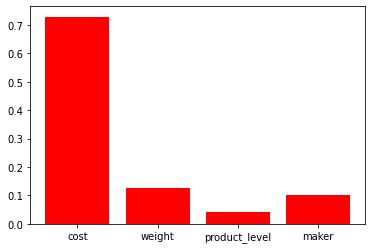

In [124]:
#plot feature importance
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), names)

## Actionable suggestions to business

Cost is the most important features that affect the price of XoX, followed by weight, maker and product_level.

June has the lowest price, so we suggest to purchase XoX in June.